What is the relative hashrate of the attacker ? (0<q<1)0.42
What is the number of attacks you will make ? 10000


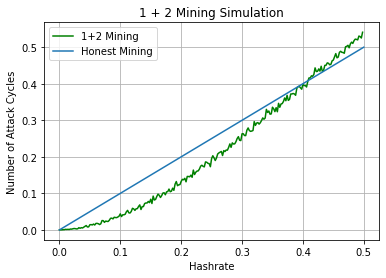

In [1]:
from secrets import randbelow
from random import random
import matplotlib.pyplot as plt
import numpy as np

def bernoulli(p):
    x = random()
    if p < 0:
        print("negative probability !")
    elif p > 1:
        print("probability greater than 1 !")
    elif x < p:             
        return(1)
    else:
        return(0)

def attack(attackerHashrate,nomberAttack) :
    trueHashrate = 1 - attackerHashrate

    Gaini=[0]
    Hauteuri=[0]
    difficultéi=[0]

    for i in range(0, nomberAttack):
        troisTest = [bernoulli(trueHashrate), bernoulli(trueHashrate), bernoulli(trueHashrate)]
        if troisTest[0]==1:
            Gaini.append(0)
            Hauteuri.append(1)
            difficultéi.append(1)
        if troisTest==[0,1,1]:
            Gaini.append(0)
            Hauteuri.append(2)
            difficultéi.append(2)
        if troisTest==[0,0,0]:
            Gaini.append(3)
            Hauteuri.append(3)
            difficultéi.append(3)
        if troisTest==[0,0,1]:
            Gaini.append(2)
            Hauteuri.append(2)
            difficultéi.append(3)
        if troisTest==[0,1,0]:
            Gaini.append(2)
            Hauteuri.append(2)
            difficultéi.append(3)

    GainTotal = sum(Gaini)
    difficultéTotal = sum(difficultéi)
    HauteurTotal = sum(Hauteuri)

    output = GainTotal/HauteurTotal
    output2 = GainTotal/difficultéTotal
    return output

def attacks(cycles, q):
    alice_blocks = []
    for _ in range(cycles):
        block = 0
        h = 0
        for i in range(3):
            rand = randbelow(101)
            if rand <= q:  # the attacker minning a block
                block += 1
                h += 1
            elif i == 0 and rand > q:  # honest miners minning the first block
                h = 1
                break
        if block == 1:  # if the attacker has mined only one block, he/she wins nothing
            h = 2
            block = 0
        alice_blocks.append((block, h))
    return alice_blocks

def goodCycles():
    while True:
        amount = input("What is the number of attacks you will make ? ")
        try:
            val = int(amount)
            if val >= 0 and val <= 10000:
                break
            else:
                print("Amount must be between 0 and 10000, try again")
        except ValueError:
            print("Amount must be a number, try again")
    return val

def main():

    attackerHashrate = float(input("What is the relative hashrate of the attacker ? (0<q<1)"))
    cycles = goodCycles()

    x = (attackerHashrate**2)*(4-attackerHashrate)
    y = 1+attackerHashrate+attackerHashrate**3
    calculeThéorique = x/y
    result = attack(attackerHashrate,cycles)

    q_vals = [q / 10 for q in range(0, 500, 2)]
    #txt="For your choice({} and {}):".format(attackerHashrate, cycles)
    #txt2="Yield for {} cycles is : {}".format(cycles, round(result, 5))

    res = [[x for x in attacks(cycles, q)] for q in q_vals]
    val = [sum(num for num, den in x)/sum(den for num, den in x) for x in res]
    q_vals = [q / 100 for q in q_vals]
    #plt.plot(q_vals, val, label="1+2 Mining")
    plt.plot(q_vals, val, color='green', label="1+2 Mining")
    plt.plot(np.linspace(0, 0.5, 100), np.linspace(0, 0.5, 100), label="Honest Mining")
    plt.legend(loc='upper left')
    #plt.figtext(0.35, 0.7, txt, ha="center")
    #plt.figtext(0.35, 0.6, txt2, ha="center")
    plt.xlabel('Hashrate')
    plt.ylabel('Number of Attack Cycles')
    plt.title("1 + 2 Mining Simulation")
    plt.grid()
    plt.show()
main()